# Data Manipulation in Python (CS2006 P2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt;
import numpy as np
from wordcloud import WordCloud, STOPWORDS

In [2]:
df=pd.read_csv("../data/CometLanding.csv",encoding="UTF-8")

In [3]:
len(df)

77319

In [4]:
df.drop_duplicates(['id_str'],inplace = True)

In [5]:
numTweets = len(df)

In [6]:
print("Total number of Tweets: " + str(numTweets))

Total number of Tweets: 77268


In [7]:
df = df[df['text'].notnull()]

In [8]:
len(df['from_user'].unique())

50195

In [9]:
language = df.groupby('user_lang')

In [10]:
language.size()

user_lang
ar           428
bg             1
ca           309
cs            42
da            89
de          2916
el            29
en         52316
en-AU          1
en-GB         23
en-gb       1972
es          7540
es-MX          2
eu            62
fa             2
fi           108
fil           10
fr          3313
gl            36
he             2
hi             2
hu            41
id            66
it          2664
ja          1514
ko            98
msa            1
nb             1
nl           838
no            36
pl           157
pt           508
pt-PT          1
ro             8
ru           794
sv           126
th            57
tr           761
uk            43
ur             1
vi             1
xx-lc         24
zh-CN          6
zh-Hans        6
zh-cn        285
zh-tw         27
dtype: int64

In [11]:
dfNoRT = df[~df.text.str.startswith('RT', na=False)]

In [12]:
numReTweets = numTweets - len(dfNoRT) 

In [13]:
print("Total number of retweets: " + str(numReTweets))

Total number of retweets: 59999


In [14]:
dfReplies = df[~df.text.str.contains('@', na=False)]

In [15]:
numReplies = len(dfReplies)

In [16]:
print("Total number of replies: " + str(numReplies))

Total number of replies: 10624


In [17]:
import re
hashtags = []
for index, row in dfNoRT.iterrows():
    text = (row['text'].split(" "))
    for token in text:
        if token.startswith('#'):
            hashtags.append(token)

"""
print("before "+str(len(hashtags)))
uniqueHashtags = np.unique(hashtags)
print("after "+str(len(uniqueHashtags)))
"""

'\nprint("before "+str(len(hashtags)))\nuniqueHashtags = np.unique(hashtags)\nprint("after "+str(len(uniqueHashtags)))\n'

In [18]:
hashtagCount = {}
thing = []

for hashtag in hashtags:
    if hashtag not in hashtagCount:
        hashtagCount[hashtag] = 1
    else:
        counter = hashtagCount.get(hashtag,'none')
        hashtagCount.update({hashtag: counter+1})
        
for key,val in hashtagCount.items():
    print (key, "=>", val)
    


##CometLanding => 27
##CometWatch => 1
#lander => 3
#navcam => 1
#cometlanding => 1834
#MiniMansbridge => 1
#CometLanding => 12741
#LetItSnow => 1
#MtRushmore => 1
#STEM => 12
#Orion => 12
#space => 76
#LunarMissionOne => 2
#NewHorizons => 3
#OrionLaunch => 2
#SongsForPhilaeToSleepBy => 4
#PhilaeLander => 10
#Livestream => 4
#esa => 76
#Orion's => 1
#OrionLaunch, => 1
#cometlanding. => 41
#RosettaMission => 28
#Ð Ð¾Ð³Ð¾Ð·Ð¸Ð½ => 1
#HappyFriday => 1
#podcast => 3
#BuffaloSnow => 1
#comedy => 3
#movies => 2
#DrMatt => 1
#Physics => 1
#UKstudy => 1
#ESA => 194
#Rosetta => 1471
#Comet => 18
#CometLanding, => 107
#KathrinAltwegg => 1
#womeninscience => 2
#GamerGate => 4
#blacklivesmatter => 1
#plur => 23
#trap => 3
#music => 8
#Ph... => 1
#GLXP => 1
#PoseToiPhilae => 144
#Philae => 734
#orion => 1
#cometlanding's => 2
#Mars => 2
#cometlandingâ€¦ => 19
#cometlandingâ€ => 9
#corsilingua => 3
#CometLanding: => 161
#rosettamission => 169
#Rose... => 1
#frostesflakes => 1
#liar => 1
#CrimingWhi

#diduseethat => 1
#imissedit => 1
#god => 1
#67P!!! => 2
#LePetitPrince => 1
#xkcd => 51
#MumbaiIn3Words
2. => 3
#CarlsenAnand
4. => 3
#DelhiDialogue => 5
#Airplay. => 1
#triphop
#Rosetta => 1
#posetoiphilae => 11
#Comet67PChuryumovGerasimenko => 2
#cometlanding
http://t.co/vcxEIdSSoc => 1
#Clangers => 3
#CyberMonday => 2
#FelizCumpleEnzo => 1
#SoyDelNortePor => 1
#FuegotePuroMambo => 7
#SpaceExploration => 4
#AwesomeShirt => 1
#BattlestarGalactica => 1
#BSG => 1
#CarlsenAnand => 4
#CometLandingâ€.....so => 1
#hardwork => 1
#Scifi => 1
#MuchCloserToHome => 1
#HappyBirthdayOmar
#edsheeransthlm
Ed => 3
#ackermann => 3
#excitingday => 1
#ScienceBitch => 2
#TechnologyNigga => 1
#LifeOutsideEarth? => 1
#Harper. => 1
#cdnpoli => 2
#selfie, => 1
#PhilaeSelfie => 1
#CometLanding.
Rosetta => 1
#cometsong => 1
#IDontAlwaysRideCometsButWhenIDo => 1
#Cometlanding. => 8
#dirtysnowball => 1
#punny => 1
#WeCanLandOnACometButWeCant
#MyFamilyIsWeird => 3
#datass => 2
#MumbaiIn3Words

#CometLanding

#C

#Filet... => 1
#Ä°nsanoÄŸlu => 1
#bugÃ¼n => 1
#uzay => 1
#aracÄ± => 1
#kuyrukluyÄ±ldÄ±z => 1
#GoogleDoodle. => 1
#CometLanding
https://t.co/kYwbabNvNj => 1
#CometLanding"tu => 1
#Celebrator => 1
#marsmission => 1
#India => 1
#Rosettaâ€ => 3
#FreakingAwesome => 1
#3DPM => 1
#AksMiranda
5. => 1
#Cometa => 2
#Castellon => 2
#humor => 2
#happydance => 1
#shirtstorm => 2
#StoryOfMyLife => 1
#China" => 1
#Humour => 1
#CdnPoli => 1
#Manufacturing => 1
#VIQU => 1
#ViveVegano
#CometLanding
#MADRIDMIRAABOGOTA
#autoinculpacions9N
#TimoGH15
Interpol
LoterÃ­a => 1
#tech? => 1
#Interstellar, => 6
#Gerasimenko => 1
#sensacional => 1
#sbux => 1
#PhilaePosee => 1
#MissionPhilae => 1
#AwesomeAchievement => 1
#Gargantua => 1
#evento => 1
#b2b => 1
#science... => 1
#ciencia! => 1
#DYK => 1
#EU => 3
#cdnfp => 1
#TheFutureIsNow => 1
#fundnasa => 1
#flu => 1
#tea => 1
#EUspace => 1
#whentechnologygoeswrong => 1
#CometLanding"@AlanSG6 => 1
#AskLamiya
4. => 1
#KingYammouni
5. => 1
#Philae
6. => 1
#Comet. => 4

#rosseta => 1
#posetoiPhilae => 2
#FarCry => 1
#posiness => 1
#Rosetta
#Jouyet => 1
#CometLanding
#Rosetta
#HomeToMama => 1
#à¸—à¸§à¸µà¸•à¹€à¸›à¸´à¸”à¸¨à¸¶à¸
#à¹€à¸«à¸™à¸µà¸¢à¸§à¹„à¸à¹ˆà¸«à¸²à¸¢ => 1
#SPN200 => 1
#dryice => 1
#thisisawesome => 1
#COMETLANDING
We => 1
#Engraving => 1
#Illustration => 1
#Cthulhu => 1
#Art => 1
#Respect! => 1
#ESOC => 10
#Bratfest => 2
#Poland => 1
#vacation => 1
#epic => 2
#Trending => 3
#askbbs => 1
#SPACE => 5
#IAP => 1
#M2Planeto => 1
#chomp => 1
#askbbs
4. => 1
#AMAHigherEd
5. => 1
#SigningDay

2014/11/12 => 1
#GagDesTages => 1
#NewZealand => 2
#67P
http://t.co/0zyDhdJX8v => 1
#livecast => 1
#badjokes => 1
#RajoyPost9NARV
#TimoGH15
#CometLanding
#LoQueOcurriÃ³ElDomingoEnBarcelona
#autoinculpacions9N
Aura
Seguir => 1
#UAAmazing => 1
#CometLanding
http://t.co/5c0kPOM6Fn => 1
#owd14
4. => 1
#Trouw

2014/11/12 => 1
#ÐŸÑ€Ð¸Ð¾Ñ€Ð¸Ñ‚ÐµÑ‚Ð¸ => 1
#Ð–ÐœÐ Ðž => 1
#Ð’ÐµÐ»ÐµÑ => 1
#Ð‰ÑƒÐ±Ð¾Ð² => 1
#Africa => 1
#LoveScience => 1
#luxleaks
2. => 5
#devoxx
4. => 

#indiefilmmaking => 1
#without => 1
#crowdfunding => 1
#distribution => 1
#landingsvake => 1
#wonder => 1
#timezones => 1
#SpaceExploration. => 1
#crunchtime => 1
#Rosettak => 2
#Cartoon => 1
#cometa! => 1
#yawn => 1
#ESAmission => 1
#Supernatural => 1
#SciComm => 2
#14 => 1
#Poem => 1
#CometLandingâ€#safelanding#following. => 1
#AloneWeFail => 1
#Philae
http://t.co/OwhqlUSCHo => 1
#phila => 2
#NaNoWriMo2014 => 1
#VampireDiaries => 1
#GoodLuckPhilae => 2
#Vivo => 1
#touchdownâ€¦ => 1
#VelveteenRabbit => 1
#RaceForSpace => 1
#Tweets => 1
#socialmedie => 1
#pr => 1
#Skwirmy, => 1
#IFLS => 1
#LosAngeles => 1
#Comet67P/Churyumovâ€“Gerasimenko. => 1
#askRosetta => 1
#TheSpaceRose => 1
#PhileaLander => 1
#Ros => 1
#RosettaSpacecraft's => 1
#EuropeanSpaceAgency... => 1
#astronautics => 1
#ESA
http://t.co/V8PkHRqU2x
http://t.co/f2tBMREX65 => 1
#Paris => 2
#lt => 1
#PoseToiPhilae, => 1
#meta => 1
#CajaB => 1
#SobresParaTodos => 1
#rosina => 1
#awestruck => 1
#countdown => 1
#thestar => 1
#weir

#opsec => 1
#Cometlanding" => 1
#film => 1
#gravitie => 1
#CometLandingâ€

CNN => 1
#HappyHumpDay => 1
#Unterrichtsmaterial => 1
#Philae-ManÃ¶ver: => 1
#bettertogether => 2
#futuredecoded => 2
#FuegotePuroMambo
2) => 1
#MateoYAndreaLoDanTodo
5) => 1
#CometLanding
Space.
This => 1
#Einstein => 1
#Newton => 1
#cometsans => 1
#GoogleAlerts => 1
#HomeToMama,#CometLanding,#MumbaiIn3Words => 1
#gophilae! => 1
#GoodLuckPhilae! => 1
#greatday => 1
#MiddleEast => 2
#WakeUp => 1
#BoomBoomTailByCORBII => 1
#wideaudience! => 1
#mace21111 => 1
#mace40341 => 1
#pistorius => 1
#AskCNES => 2
#OTD => 1
#Ä°ÅžÄ°D => 1
#GoGetIt => 1
#F1 => 1
#bpulse => 1
#ESOC, => 1
#SirIsaacNewton => 1
#ConquerAgilkaIsland => 1
#sexiestmission => 1
#Yipe => 1
#participium => 1
#quitehyped => 1
#esa
Lâ€™Europian => 1
#tweet => 1
#noticias, => 1
#coleslaw => 1
#topscience => 1
#RosettaFacts => 1
#Resetta => 1
#humanityisdoomed => 1
#CometLanding
http://t.co/DceKMZNsrV => 1
#thrilling => 1
#ChuryumovGerasimenko. => 1
#fara

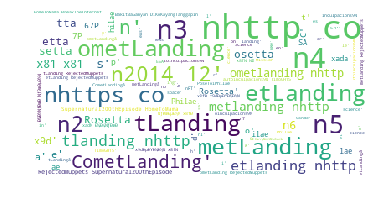

In [ ]:
for key,val in hashtagCount.items():
    thing.append(key)
    
thing = [e[1:] for e in thing]
stopwords = set(STOPWORDS)
stopwords.add("CometLanding")


wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=30000,max_font_size=40, random_state=42).generate(str(thing))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("wordCloud.png", dpi=5500)

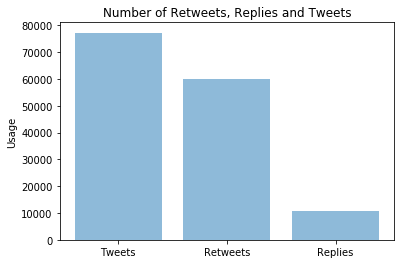

In [20]:
    objects = ('Tweets','Retweets', 'Replies')
    y_pos = np.arange(len(objects))
    performance = [numTweets,numReTweets,numReplies]

    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Usage')
    plt.title('Number of Retweets, Replies and Tweets')

    plt.show()